In [57]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt
from IPython.display import HTML

In [58]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)
mp_drawing = mp.solutions.drawing_utils          # mediapipe 繪圖方法

In [59]:
#Input_Image
sample_img  = cv2.imread(r'G:\testAI\mediapipe\engle_test\unknown.jpg')

In [60]:
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmarks.
    for i in range(len(mp_pose.PoseLandmark)):
        
        # Display the found normalized landmarks.
        print(f'{i},{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}') 

0,NOSE:
x: 0.50848895
y: 0.25114733
z: -0.2872239
visibility: 0.99999785

1,LEFT_EYE_INNER:
x: 0.527889
y: 0.22129029
z: -0.2495182
visibility: 0.99999714

2,LEFT_EYE:
x: 0.53883135
y: 0.2224999
z: -0.2499929
visibility: 0.99999666

3,LEFT_EYE_OUTER:
x: 0.5516761
y: 0.2243774
z: -0.249965
visibility: 0.9999974

4,RIGHT_EYE_INNER:
x: 0.48930728
y: 0.21979886
z: -0.24317327
visibility: 0.9999982

5,RIGHT_EYE:
x: 0.4773473
y: 0.22046334
z: -0.24388567
visibility: 0.99999833

6,RIGHT_EYE_OUTER:
x: 0.46732467
y: 0.22208744
z: -0.24408051
visibility: 0.99999857

7,LEFT_EAR:
x: 0.56790864
y: 0.23797327
z: -0.045316428
visibility: 0.99999785

8,RIGHT_EAR:
x: 0.44951686
y: 0.23822844
z: -0.01889608
visibility: 0.9999974

9,MOUTH_LEFT:
x: 0.5303673
y: 0.28059727
z: -0.21073546
visibility: 0.99999857

10,MOUTH_RIGHT:
x: 0.4868284
y: 0.28024662
z: -0.20758599
visibility: 0.99999845

11,LEFT_SHOULDER:
x: 0.6629393
y: 0.42096037
z: -0.0644191
visibility: 0.9999957

12,RIGHT_SHOULDER:
x: 0.3554411
y:

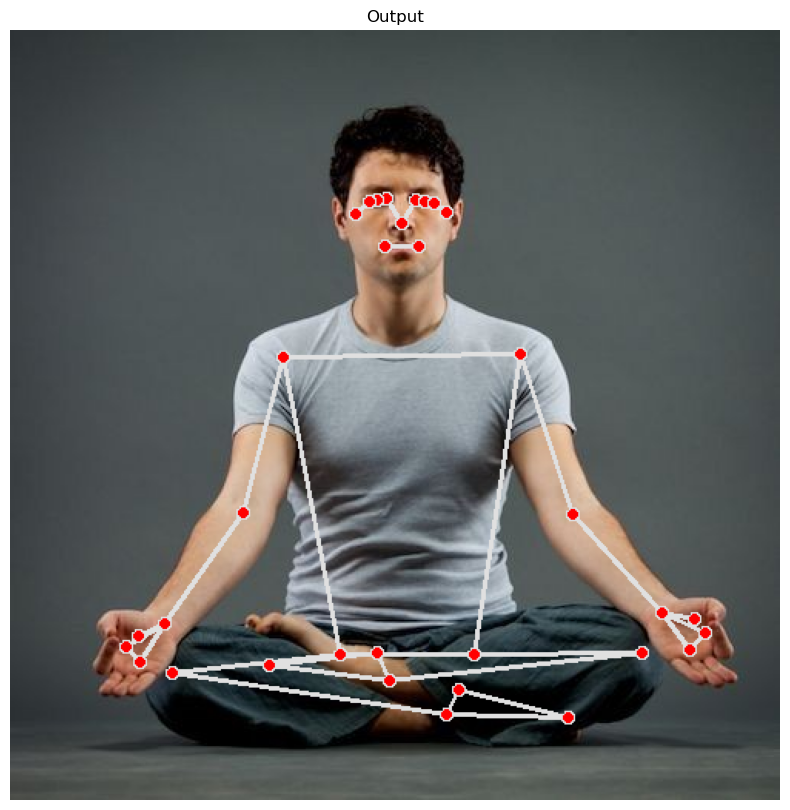

In [61]:
# Create a copy of the sample image to draw landmarks on.
img_copy = sample_img.copy()

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Draw Pose landmarks on the sample image.
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
       
    # Specify a size of the figure.
    fig = plt.figure(figsize = [10, 10])

    # Display the output image with the landmarks drawn, also convert BGR to RGB for display. 
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

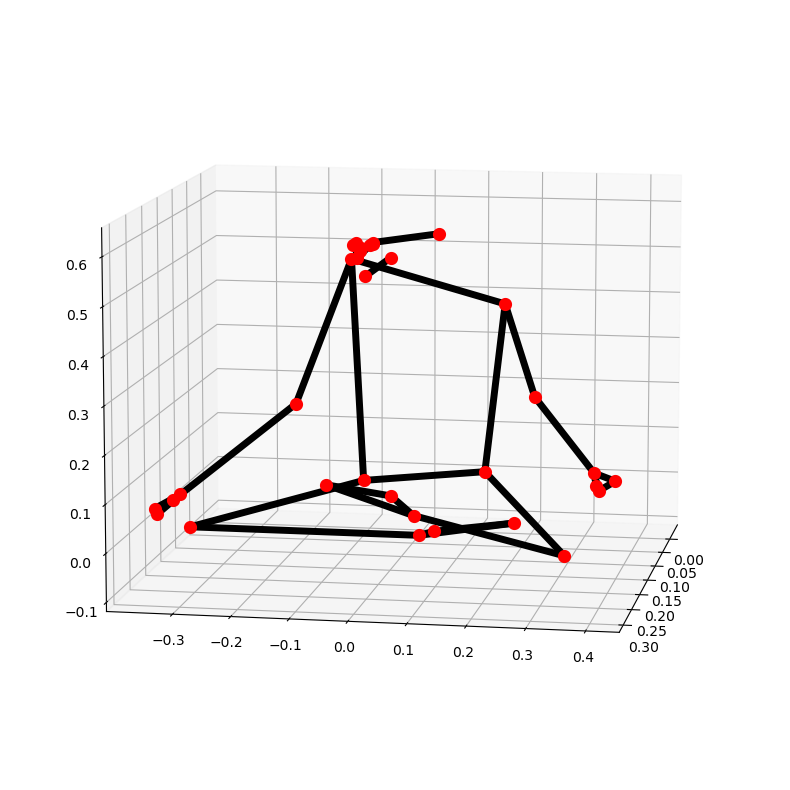

In [62]:
# Plot Pose landmarks in 3D.
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [63]:
def detectPose(image, pose, display=True):
    output_image = image.copy()
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(imageRGB) # detect
    height, width, _ = image.shape
    landmarks = [] # 初始化list 以便儲存已檢測之關鍵點.
    if results.pose_landmarks:
    # 畫關鍵點在圖片上
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                            connections=mp_pose.POSE_CONNECTIONS)
        for landmark in results.pose_landmarks.landmark:
        # 將關鍵點加進list內.
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                            (landmark.z * width)))
    if display:
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        # 在3D中畫Pose座標.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
    else:
        return output_image, landmarks

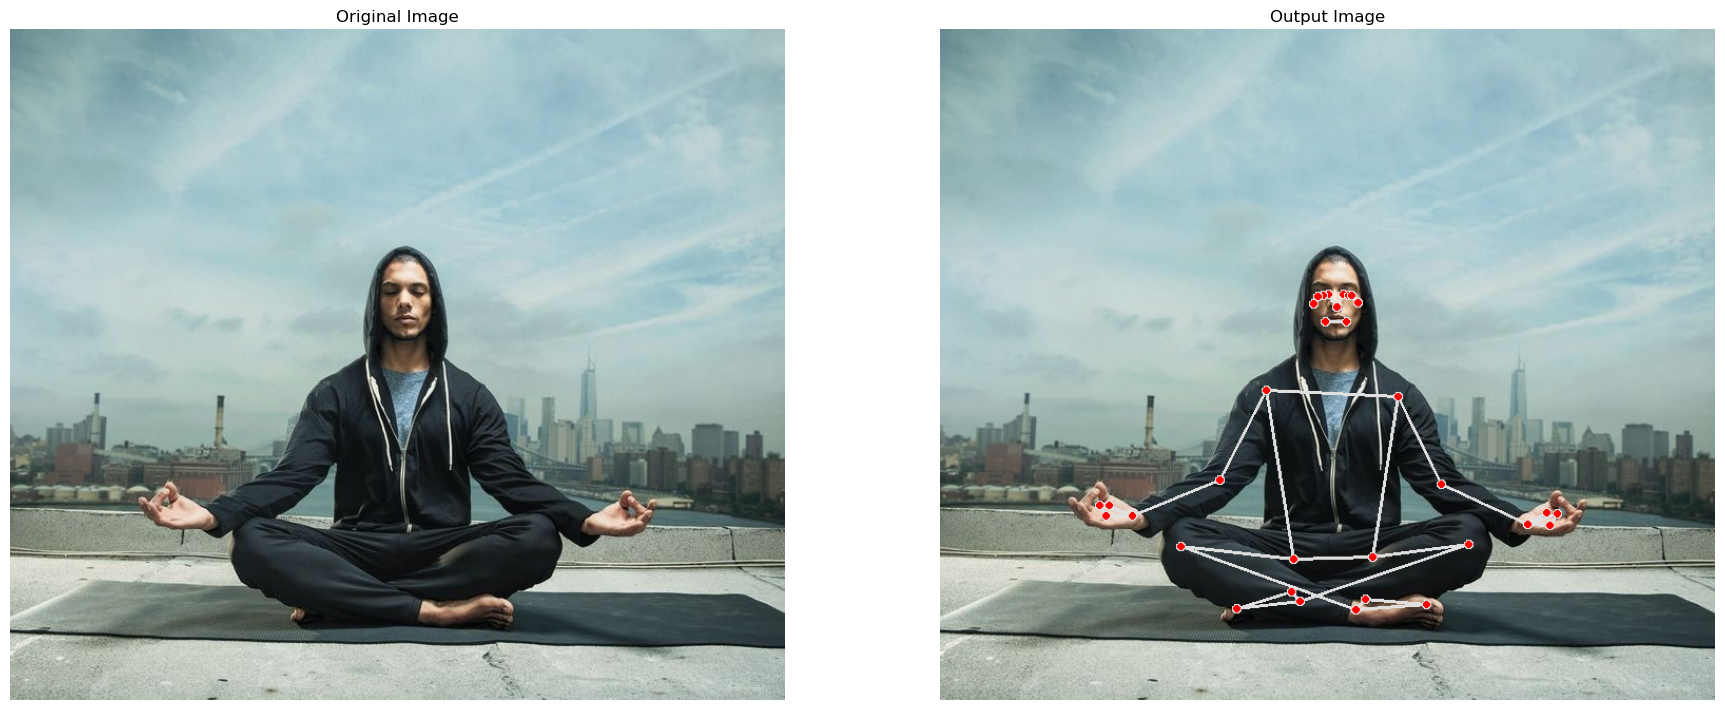

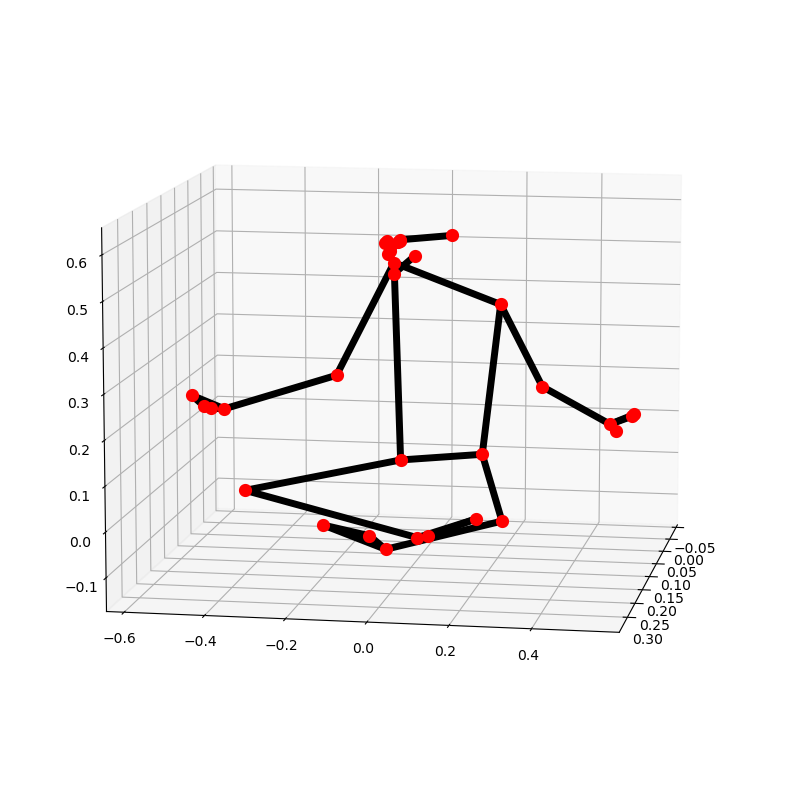

In [64]:
image = cv2.imread(r'G:\testAI\mediapipe\engle_test\unknown1.jpg')
detectPose(image, pose, display=True)

In [65]:
# 計算角度的副函式
def calculateAngle(landmark1, landmark2, landmark3):
    # 獲取所需座標
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3
    # 計算三點之間的夾角
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    if angle < 0:
        angle += 360
    return angle

In [66]:
# 測試角度計算
angle = calculateAngle((558, 326, 0), (642, 333, 0), (718, 321, 0))
print(f'The calculated angle is {angle}')

The calculated angle is 166.26373169437744


In [67]:
def classifyPose(landmarks, output_image, display=False):
    label = 'Unknown Pose'
    color = (0, 0, 255)  
    #----------------------------------------------------------------------------------------------------------------
    # 取得左肩、左肘和左腕之間的夾角。    # 11 13 15
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    # 取得右肩、右肘和右腕之間的夾角。    # 12 14 16 
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])   
    # 取得左肘、左肩和左臀之間的夾角。    # 13 11 23
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])
    # 取得右臀、右肩和右肘之間的夾角。    # 14 12 24
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])
    # 取得左臀、左膝蓋和左腳踝之間的角度。# 23 25 27
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])
    # 取得右臀、右膝蓋和右腳踝之間的角度。# 24 26 28 
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the warrior II pose or the T pose.
    # As for both of them, both arms should be straight and shoulders should be at the specific angle.
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if the both arms are straight.
    if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:

        # Check if shoulders are at the required angle.
        if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:

    # Check if it is the warrior II pose.
    #----------------------------------------------------------------------------------------------------------------

            # Check if one leg is straight.
            if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:

                # Check if the other leg is bended at the required angle.
                if left_knee_angle > 90 and left_knee_angle < 120 or right_knee_angle > 90 and right_knee_angle < 120:

                    # Specify the label of the pose that is Warrior II pose.
                    label = 'Warrior II Pose' 
                        
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the T pose.
    #----------------------------------------------------------------------------------------------------------------
    
            # Check if both legs are straight
            if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:

                # Specify the label of the pose that is tree pose.
                label = 'T Pose'

    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the tree pose.
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if one leg is straight
    if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:

        # Check if the other leg is bended at the required angle.
        if left_knee_angle > 315 and left_knee_angle < 335 or right_knee_angle > 25 and right_knee_angle < 45:

            # Specify the label of the pose that is tree pose.
            label = 'Tree Pose'
                
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if the pose is classified successfully
    if label != 'Unknown Pose':
        
        # Update the color (to green) with which the label will be written on the image.
        color = (0,0,255)  
    
    # Write the label on the output image. 
    cv2.putText(output_image, label, (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, color, 2)
    
    # Check if the resultant image is specified to be displayed.
    if display:
    
        # Display the resultant image.
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
    else:
        
        # Return the output image and the classified label.
        return output_image, label

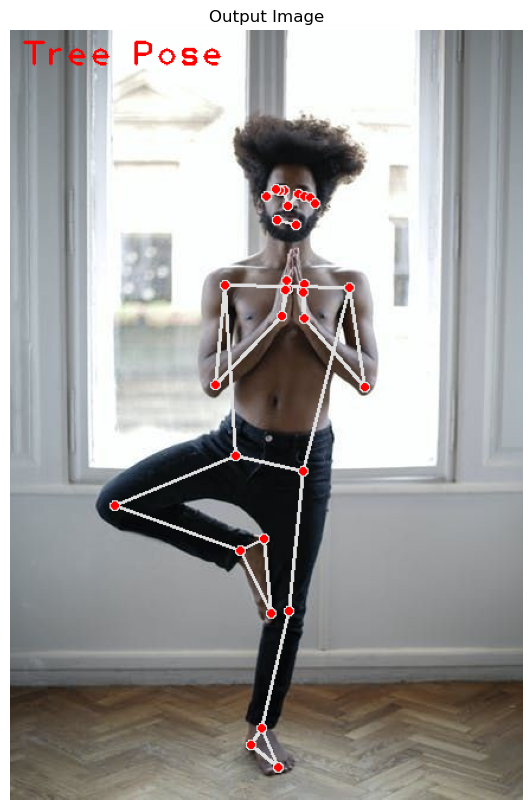

In [68]:
image = cv2.imread(r'G:\testAI\mediapipe\engle_test\tree.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

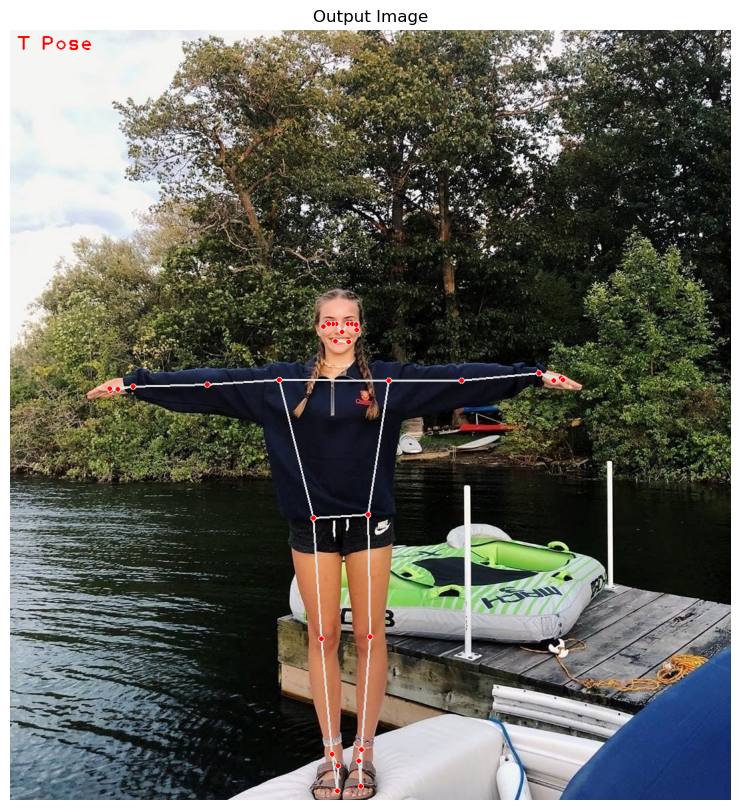

In [69]:
image = cv2.imread(r'G:\testAI\mediapipe\engle_test\Tpose1.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

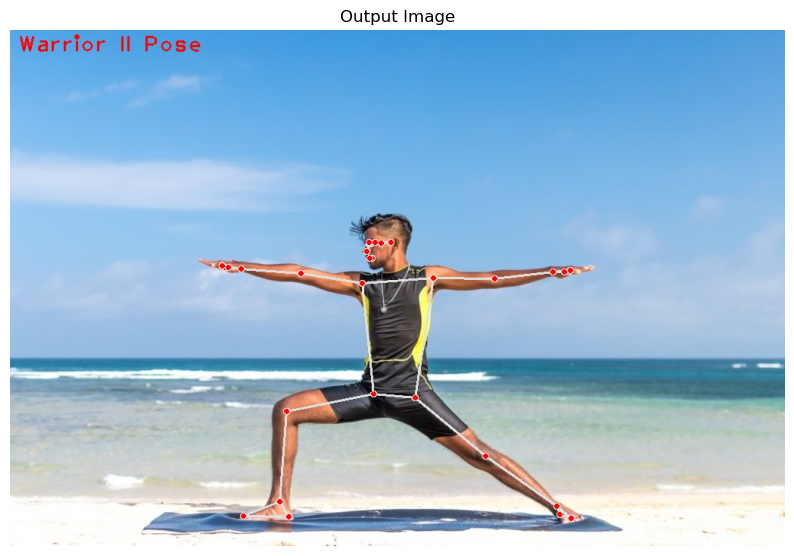

In [70]:
image = cv2.imread(r'G:\testAI\mediapipe\engle_test\warriorIIpose.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)